# Load data

In [61]:
# Import necessary libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Load the dataset from Hugging Face 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Clean up the 'job_posted_date' column by converting it to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [62]:
# Step 1: Filter for US data analyst jobs only. Call it df_DA_US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & 
               (df['job_country'] == 'United States')].copy()
# drop na from salary_year_avg
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [ ]:
# Step 2: Explode job_skills column
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded

In [64]:
# Step 3: Count the number of occurrences of each skill and select top 10
top_10_demand_skills_list = df_DA_US_exploded.value_counts('job_skills').head(10).index.tolist()
top_10_demand_skills_list

['sql',
 'excel',
 'python',
 'tableau',
 'sas',
 'r',
 'power bi',
 'powerpoint',
 'word',
 'sql server']

In [65]:
# Step 4: Count the median salary for each skill and select top 10 skills.
top_10_paying_skills_df = df_DA_US_exploded.pivot_table(index='job_skills', values='salary_year_avg', aggfunc='median').sort_values('salary_year_avg', ascending=False).head(10)
top_10_paying_skills_df

,salary_year_avg
job_skills,
dplyr,196250.0
bitbucket,189000.0
gitlab,186000.0
solidity,179000.0
hugging face,175000.0
couchbase,160515.0
ansible,159640.0
mxnet,149000.0
cassandra,148250.0


In [66]:
# Step 5: Count the median salary for top_10_demand skill calucted in Step 3
median_salary_df = df_DA_US_exploded.pivot_table(index='job_skills', values='salary_year_avg', aggfunc='median')
top_10_demand_skills_df = median_salary_df[median_salary_df.index.isin(top_10_demand_skills_list)]
top_10_demand_skills_df = median_salary_df.reindex(top_10_demand_skills_list)
top_10_demand_skills_df

,salary_year_avg
job_skills,
sql,91000.00
excel,84392.00
python,97500.00
tableau,92875.00
sas,90000.00
r,92500.00
power bi,90000.00
powerpoint,85000.00
word,81194.75


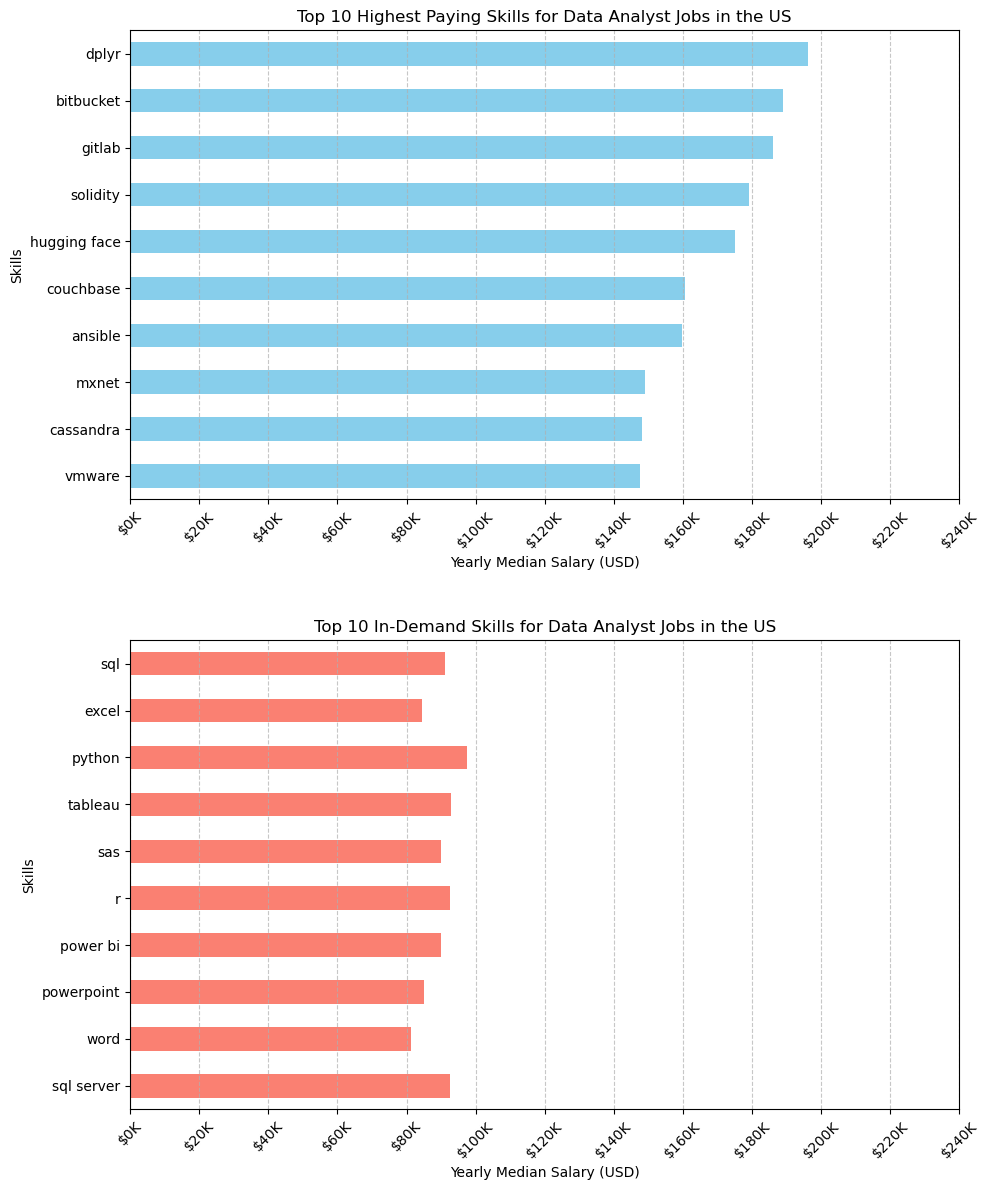

In [ ]:
# Plot - plot 2 subplots - One for top 10 highest paying skills (Y-axis) and median salary (X-axis). 
# Second for highest demand skills (Y-axis) and median salary (X-axis).
# Both plots should be horizontal bar plots with X-axis same scale.

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Top 10 Highest Paying Skills
top_10_paying_skills_df.plot(kind='barh', color='skyblue', ax=ax1)
ax1.set_title('Top 10 Highest Paying Skills for Data Analyst Jobs in the US')
ax1.set_xlabel('Yearly Median Salary (USD)')
ax1.set_ylabel('Skills')
ax1.legend().set_visible(False)
ax1.set_xticks(range(0, 240001, 20000))
ax1.set_xticklabels([f'${int(x/1000):,}K' for x in range(0, 240001, 20000)], rotation=45)
ax1.grid(axis='x', linestyle='--', alpha=0.7)
ax1.invert_yaxis()

# Plot 2: Top 10 In-Demand Skills
top_10_demand_skills_df.plot(kind='barh', color='salmon', ax=ax2)
ax2.set_title('Top 10 In-Demand Skills for Data Analyst Jobs in the US')
ax2.set_xlabel('Yearly Median Salary (USD)')
ax2.set_ylabel('Skills')
ax2.legend().set_visible(False)
ax2.set_xticks(range(0, 240001, 20000))
ax2.set_xticklabels([f'${int(x/1000):,}K' for x in range(0, 240001, 20000)], rotation=45)
ax2.grid(axis='x', linestyle='--', alpha=0.7)
ax2.invert_yaxis()

fig.tight_layout()
fig.subplots_adjust(hspace=0.3)  # Increase this value for more space

plt.show()